## Feature Engineering


*   The fourth project is the development of a notebook (code + explanation) that successfully engineers 12 unique types of features, **three** for each type of feature engineering: **transforming**, **interacting**, **mapping**, and **extracting**.
* The second part of the assignment is the development of a **deep learning classification** model to predict the direction of the S&P500 for the dates **2018-01-01—2018-07-12** (test set).
* The feature engineering section is unrelated to the model section, you can develop any features, not just features that would work for deep learning models (later on you can decide which features to use in your model).
*  You also have to uncomment all the example features and make them run successfully  → **every** feature example has some error/s that you have to fix. Please also describe the error you fixed!
*   Note that we *won't* be attempting to measure the quality of every feature (i.e., how much it improves the model), that is slightly too advanced for this course.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

Preparing the Data

In [2]:
# preparing our data
raw_prices = pd.read_csv("https://storage.googleapis.com/sovai-public/random/assetalloc.csv", sep=';', parse_dates=True, index_col='Dates', dayfirst=True)
df = raw_prices.sort_values(by='Dates')
df["target"] = df["SP500"].pct_change().shift(-1)
df["target"] = np.where(df["target"]>0,1,0)
df.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,target
Dates,,,,,,,,,,,,,,,,,,
1989-02-01,2039.7,875.47,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,101.080,101.936,154.38,117.50,1636.57,133.584,286.67,0
1989-02-02,2043.4,878.08,296.84,392.00,98.898,99.117,99.278,99.692,100.000,100.314,101.017,101.905,154.94,117.69,1642.94,135.052,287.03,1
1989-02-03,2069.9,884.09,296.97,388.75,98.907,99.002,99.145,99.178,99.812,100.062,100.921,101.718,155.69,118.62,1659.11,137.134,285.63,0
1989-02-06,2044.3,885.49,296.04,388.00,98.484,98.502,98.510,97.739,99.812,100.062,100.794,101.468,155.58,118.89,1656.86,137.037,284.69,1
1989-02-07,2072.8,883.82,299.63,392.75,98.438,98.312,98.292,97.688,99.906,100.251,101.144,102.092,156.84,118.28,1662.76,136.914,284.21,0


`FTSE`: This is the Financial Times Stock Exchange 100 Index, which is a share index of the 100 companies listed on the London Stock Exchange with the highest market capitalization.

`EuroStoxx50`: This is the Euro Stoxx 50 Index, which is a stock index of Eurozone stocks designed by the Stoxx Ltd. It represents the performance of 50 large-cap stocks across several Eurozone countries.

`SP500`: This is the S&P 500 Index, which is a stock market index tracking the performance of 500 large-cap U.S. stocks.

`Gold`: This likely represents the price of gold, which is a precious metal often used as a safe-haven asset.

`French-2Y`, `French-5Y`, `French-10Y`, `French-30Y`: These represent French government bond yields with maturities of 2 years, 5 years, 10 years, and 30 years, respectively.

`US-2Y`, `US-5Y`, `US-10Y`, `US-30Y`: These represent U.S. government bond yields with maturities of 2 years, 5 years, 10 years, and 30 years, respectively.

`Russel2000`: This is the Russell 2000 Index, which is a small-cap stock market index of the bottom 2,000 stocks in the Russell 3000 Index.

`EuroStox_Small`: This likely represents a small-cap stock index for Eurozone companies.

`FTSE_Small`: This likely represents a small-cap stock index for companies listed on the London Stock Exchange.

`MSCI_EM`: This is the MSCI Emerging Markets Index, which is a stock market index that captures large and mid-cap representation across 24 emerging markets countries.

`CRB`: This likely represents the Commodity Research Bureau (CRB) Index, which is a weighted geometric mean of commodity futures prices.

`target`: This is likely the target variable you are trying to predict, such as the future direction of the S&P 500 or some other asset.



In [3]:
df.corr()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB,target
FTSE,1.000000,0.862250,0.929262,0.569529,0.048689,0.823262,0.803871,0.798883,0.685521,0.671510,0.663647,0.674435,0.853414,0.760668,0.892512,0.725363,0.573822,-0.005875
EuroStoxx50,0.862250,1.000000,0.720064,0.189884,0.242232,0.540548,0.488057,0.515174,0.376398,0.325683,0.307261,0.372137,0.567170,0.564448,0.670561,0.442686,0.223265,-0.023501
SP500,0.929262,0.720064,1.000000,0.642437,-0.217058,0.873509,0.923169,0.920081,0.756808,0.764339,0.767072,0.775771,0.963553,0.834068,0.970001,0.727030,0.610699,-0.005276
Gold,0.569529,0.189884,0.642437,1.000000,-0.208941,0.812371,0.781796,0.747971,0.866662,0.902641,0.874270,0.790466,0.763853,0.668011,0.657706,0.862343,0.942625,0.017045
French-2Y,0.048689,0.242232,-0.217058,-0.208941,1.000000,0.034071,-0.208039,-0.217786,0.040552,-0.060950,-0.102961,-0.090207,-0.306378,-0.430211,-0.311672,-0.123345,-0.165385,-0.005566
French-5Y,0.823262,0.540548,0.873509,0.812371,0.034071,1.000000,0.959564,0.942960,0.953833,0.948444,0.934305,0.914417,0.901472,0.704522,0.834289,0.791251,0.755232,0.008285
French-10Y,0.803871,0.488057,0.923169,0.781796,-0.208039,0.959564,1.000000,0.991336,0.893446,0.912505,0.922899,0.919260,0.951831,0.772905,0.898538,0.754900,0.707641,0.008079
French-30Y,0.798883,0.515174,0.920081,0.747971,-0.217786,0.942960,0.991336,1.000000,0.868092,0.885204,0.899491,0.916177,0.941512,0.781863,0.894556,0.732099,0.670590,0.004361
US-2Y,0.685521,0.376398,0.756808,0.866662,0.040552,0.953833,0.893446,0.868092,1.000000,0.985145,0.949370,0.896874,0.828193,0.608720,0.713317,0.797039,0.804007,0.009725
US-5Y,0.671510,0.325683,0.764339,0.902641,-0.060950,0.948444,0.912505,0.885204,0.985145,1.000000,0.984799,0.928203,0.840737,0.623831,0.728414,0.785251,0.815405,0.009925


### Train Test Split

In [4]:
from sklearn.model_selection import train_test_split
y = df.pop("target")
X = df.copy()

X_train = X[X.index.astype(str)<'2018-01-01']
y_train = y[X_train.index]
X_test = X[~X.index.isin(X_train.index)]
y_test = y[X_test.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### Transforming

1. Refresh your mind on tranformation methods by going back to the material. I am simply providing 1 example here.
1. Don't repeat my logarithmic return calculation, develop your own transformation (there are 1000s of types of transformations).
1. In the example I provide, there is also an error that you have to fix. For example, one of the errors below is that you should actually use `np.log1p()`, but there is another one, so watch out!

In [5]:
# Example Transforming (has errors)

# Name: Logarithmic return of FTSE
# Description: Developing the logarithmic return feature for use within linear models that make normality assumptions.

df["FTSE_log"] = np.log1p(df["FTSE"].pct_change())

This code calculates the percentage change of the "FTSE" index using `pct_change()` method. Then, it applies `np.log1p()` to compute the natural log of one plus the percentage change, ensuring numerical stability. We use `np.log1p()` since we are dealing with small values close to zero instead of the traditional `np.log()`

In [6]:
## Transforming 1 (Add code below)

# Apply moving averages to the entire dataset
sma_cols = ['FTSE', 'EuroStoxx50', 'SP500', 'Russel2000', 'EuroStox_Small', 'FTSE_Small', 'MSCI_EM', 'Gold', 'CRB']
for col in sma_cols:
    df[f'{col}_SMA_10'] = df[col].rolling(window=10).mean()
    df[f'{col}_SMA_20'] = df[col].rolling(window=20).mean()

I calulated Simple Moving Average for the stock indices and commodity prices in our dataset. SMA gives equal weight to all prices within the specified window. By including moving averages with different window sizes (e.g., 10 and 20 periods), we can capture short-term and medium-term trends. Moving averages help smooth out short-term fluctations in price data, making it easier to identify the underlying trend

In [7]:
## Transforming 2 (Add code below)
# Apply Bollinger Bands to the entire dataset
bb_cols = ['FTSE', 'EuroStoxx50', 'SP500', 'Russel2000', 'EuroStox_Small', 'FTSE_Small', 'MSCI_EM', 'Gold', 'CRB']
for col in bb_cols:
    df[f'{col}_BB_Middle'] = df[col].rolling(window=20).mean()
    df[f'{col}_BB_Upper'] = df[f'{col}_BB_Middle'] + 2 * df[col].rolling(window=20).std()
    df[f'{col}_BB_Lower'] = df[f'{col}_BB_Middle'] - 2 * df[col].rolling(window=20).std()


I calculared the Bollinger Bands. The middle band is set as a 20-period moving average, and the upper and lower bands are set two standard deviations away from the middle band. By comparing the price action to the Bollinger Bands, we can gauge the volatility and potential overbought or oversold conditions. Bollinger Bands help measure the volatility of an asset's price and identify potential overbought or oversold conditions.

In [8]:
## Transforming 3 (Add code below)

# Apply RSI to the entire dataset
rsi_cols = ['FTSE', 'EuroStoxx50', 'SP500', 'Russel2000', 'EuroStox_Small', 'FTSE_Small', 'MSCI_EM', 'Gold', 'CRB']
for col in rsi_cols:
    delta = df[col].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df[f'{col}_RSI'] = 100 - (100 / (1 + rs))

I caclulated the RSI (Relative Strength Index). RSI is computed by comparing the magnitude of recent gains to recent losses over a specified period (usually 14 periods). A high RSI value indicates that the asset has experienced more gains than losses recently, suggesting a potentially overbought condition. Conversely, a low RSI value indicates more losses than gains, suggesting a potentially oversold condition. RSI is a momentum oscillator that measures the speed and change of price movements. It helps identify overbought or oversold conditions and potential trend reversals. RSI ranges from 0 to 100, with values above 70 typically considered overbought and values below 30 considered oversold.

### Interacting

There are millions of possible interaction methods, be creative and come up with your own. For this assignment there is no 'right' feature engineering method, you simply develop one, and give it a name and a discreption.

In [9]:
# Example Interacting (has errors)

# Name: Ratio of Gold return to 10Y treasury
# Desciption: Both gold and treasuries are safe-haven assets and descrepency in their ratio could be a sign of some marco-economic event.

def gold_to_yield(df):
    # Calculate percentage change of "US-10Y" column
    teny_returns = df["US-10Y"].pct_change()

    # Handle NaN values in teny_returns
    teny_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
    teny_returns.fillna(method='ffill', inplace=True)  # Forward fill NaN values

    # Calculate gold_r__div__teny_r
    gold_returns = df["Gold"]

    # Handle division by zero
    df["gold_r__div__teny_r"] = np.where(teny_returns != 0, gold_returns / teny_returns, np.nan)

    return df

X_train = gold_to_yield(X_train); X_test = gold_to_yield(X_test)

The function `gold_to_yield()` was updated to include error handling for division by zero. This was achieved by checking if the percentage change of the "US-10Y" column is not zero before performing the division operation. If it's zero, NaN is assigned to the corresponding entry in the `gold_r__div__teny_r` column to prevent the occurrence of inf (infinity) values in the output.

In [10]:
## Interacting 1 (Add code below)

def emerging_markets_exposure(df):
    # Calculate the ratio of MSCI Emerging Markets Index returns to S&P 500 returns
    em_sp500_ratio = df["MSCI_EM"].pct_change() / df["SP500"].pct_change()

    # Handle NaN values
    em_sp500_ratio.replace([np.inf, -np.inf], np.nan, inplace=True)
    em_sp500_ratio.fillna(method='ffill', inplace=True)  # Forward fill NaN values

    # Create a new feature for emerging markets exposure
    df["emerging_markets_exposure"] = em_sp500_ratio

    return df

X_train = emerging_markets_exposure(X_train)
X_test = emerging_markets_exposure(X_test)

The ratio of the MSCI Emerging Markets Index returns to the S&P 500 returns could indicate the level of exposure to emerging markets within an investment portfolio, potentially reflecting changes in global economic dynamics.

In [11]:
## Interacting 2 (Add code below)

def bond_yield_curve_slope(df):
    # Calculate the difference in yields between 30-year and 2-year French government bonds
    yield_curve_slope = df["French-30Y"] - df["French-2Y"]

    # Create a new feature for bond yield curve slope
    df["bond_yield_curve_slope"] = yield_curve_slope

    return df

X_train = bond_yield_curve_slope(X_train)
X_test = bond_yield_curve_slope(X_test)

The difference between the yields of long-term (30-year) and short-term (2-year) French government bonds could indicate changes in the shape of the yield curve, reflecting shifts in interest rate expectations or economic conditions.

In [12]:
## Interacting 3 (Add code below)

def market_cap_spread(df):
    # Calculate the difference in market capitalizations between EuroStoxx50 and FTSE
    euro_stoxx50_market_cap = df["EuroStoxx50"]
    ftse_market_cap = df["FTSE"]
    market_cap_spread = euro_stoxx50_market_cap - ftse_market_cap

    # Create a new feature for market-cap spread
    df["market_cap_spread"] = market_cap_spread

    return df

X_train = market_cap_spread(X_train)
X_test = market_cap_spread(X_test)

The difference between the market capitalizations of the EuroStoxx50 and the FTSE indices could signify relative shifts in market sentiment or investor preferences across Eurozone and UK stocks.

### Mapping

This one is slightly harder, you have to identify other  dimensionality reduction methods, there are many more than just PCA. Maybe you can also look at performing the decompositions just on a single asset classes, e.g., US-2Y, US-5Y, US-10Y, US-30Y is a fixed income asset class, but there are a few others in the dataset.

In [13]:
# Example Mapping (has errors)

# Name: First prinicipal component of all of the assets returns
# Description:For stocks the first component resmbles the return of the market, for multiple asset classes it could resemble a 'universal' asset class


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def pca_first(X_train, X_test):
    # Fill missing values with column means
    X_train_filled = X_train.fillna(X_train.mean())
    X_test_filled = X_test.fillna(X_train.mean())  # Fill test set with train set means

    # Scale the data
    sc = StandardScaler()
    X_train_scaled = sc.fit_transform(X_train_filled)
    X_test_scaled = sc.transform(X_test_filled)

    # Perform PCA
    pca = PCA(n_components=1)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Assign the first principal component as a new feature
    X_train["first_principal"] = X_train_pca
    X_test["first_principal"] = X_test_pca

    return X_train, X_test

X_train, X_test = pca_first(X_train, X_test)


# # ValueError: Input contains infinity or a value too large for dtype('float64'). Fix it!

This code addresses missing values by filling them with column means, scales the data using `StandardScaler`, performs PCA to extract the first principal component, and then assigns it as a new feature in both the training and test datasets.

In [14]:
## Mapping 1 (Add code below)

from sklearn.decomposition import SparsePCA

def sparse_pca_reduction(X_train, X_test, n_components=2):
    fixed_income_assets = ["US-2Y", "US-5Y", "US-10Y", "US-30Y"]
    X_train_fixed_income = X_train[fixed_income_assets]
    X_test_fixed_income = X_test[fixed_income_assets]

    sparse_pca = SparsePCA(n_components=n_components, random_state=42)
    X_train_sparse_pca = sparse_pca.fit_transform(X_train_fixed_income)
    X_test_sparse_pca = sparse_pca.transform(X_test_fixed_income)

    return X_train_sparse_pca, X_test_sparse_pca

# Apply SparsePCA on fixed income asset class
X_train_sparse_pca, X_test_sparse_pca = sparse_pca_reduction(X_train, X_test, n_components=2)

The fixed income asset class typically consists of data with sparse patterns, as changes in bond yields may not occur frequently. SparsePCA is chosen as it encourages sparsity in the components it extracts. By applying SparsePCA specifically on the fixed income asset class, we aim to capture sparse representations of the data, emphasizing the most important features while minimizing the impact of noise.

In [15]:
## Mapping 2 (Add code below)
from sklearn.decomposition import NMF

def nmf_equity_reduction(X_train, X_test, n_components=2):
    equity_assets = ["FTSE", "EuroStoxx50", "SP500"]
    X_train_equity = X_train[equity_assets]
    X_test_equity = X_test[equity_assets]

    nmf = NMF(n_components=n_components, random_state=42)
    X_train_nmf = nmf.fit_transform(X_train_equity)
    X_test_nmf = nmf.transform(X_test_equity)

    return X_train_nmf, X_test_nmf

# Apply NMF on equity asset class
X_train_nmf, X_test_nmf = nmf_equity_reduction(X_train, X_test, n_components=2)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Non-Negative Matrix Factorization (NMF) is a technique that decomposes a matrix into the product of two lower-rank matrices, ensuring that all elements are non-negative. The equity asset class often contains data with inherently non-negative values, such as stock prices or market indices. By utilizing NMF specifically on the equity asset class, we aim to factorize the data into non-negative components, which could represent underlying factors or patterns in the equity market.

In [16]:
## Mapping 3 (Add code below)

from sklearn.decomposition import FastICA

def ica_commodity_reduction(X_train, X_test, n_components=2):
    commodity_assets = ["Gold", "CRB"]
    X_train_commodity = X_train[commodity_assets]
    X_test_commodity = X_test[commodity_assets]

    ica = FastICA(n_components=n_components, random_state=42)
    X_train_ica = ica.fit_transform(X_train_commodity)
    X_test_ica = ica.transform(X_test_commodity)

    return X_train_ica, X_test_ica

# Apply ICA on commodity asset class
X_train_ica, X_test_ica = ica_commodity_reduction(X_train, X_test, n_components=2)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


Independent Component Analysis (ICA) is a method for separating a multivariate signal into additive, independent components. The commodity asset class typically consists of various commodities that may exhibit independent behavior from each other. By applying ICA specifically on the commodity asset class, such as gold and commodity index prices, we aim to extract independent components from the data, which could represent distinct market dynamics or sources of variability in commodity prices.

Extracting

In [17]:
# Example Extracting (has errors)
# Name: Annualized volatility in returns
# Description: We are developing an annualized volatility measure for all asset returns, which is a good measure of market turbulence

def annualized_volatility(df, window=365):
    # Calculate percentage change of asset returns
    returns = df.pct_change()

    # Calculate rolling standard deviation and annualize
    volatility = returns.rolling(window=window).std() * (365 ** 0.5)

    # Rename columns with '_vol' suffix
    new_columns = [f"{col}_vol" for col in df.columns]
    volatility.columns = new_columns

    # Align indices before concatenating
    volatility = volatility.reindex(df.index)

    # Concatenate original DataFrame with volatility DataFrame
    df_with_volatility = pd.concat([df, volatility], axis=1)

    return df_with_volatility

# Example usage
X_train = annualized_volatility(X_train)
X_test = annualized_volatility(X_test)

The error in the code was due to the misalignment of indices during concatenation. I added the line volatility = volatility.reindex(df.index) to align the indices of the volatility DataFrame with the original DataFrame df and ensured that the concatenation of the original DataFrame with the volatility DataFrame is done with aligned indices, preventing any mismatch between rows.

In [18]:
## Extracting 1 (Add code below)
def rolling_average_bond_yields(df, maturity_periods=['US-2Y', 'US-5Y', 'US-10Y', 'US-30Y'], window=30):
    for period in maturity_periods:
        df[f'{period}_rolling_avg'] = df[period].rolling(window=window).mean()
    return df

# Example usage
X_train = rolling_average_bond_yields(X_train)
X_test = rolling_average_bond_yields(X_test)

I calculated the rolling average of bond yields for different maturity periods (e.g., US-2Y, US-5Y, US-10Y, US-30Y). This extraction method captures the trend in bond yields over time, providing insights into the yield curve dynamics.

In [19]:
## Extracting 2 (Add code below)
def price_momentum_indicator(df, indices=['FTSE', 'EuroStoxx50', 'SP500'], window=30):
    for index in indices:
        df[f'{index}_momentum'] = df[index].diff(window)
    return df

# Example usage
X_train = price_momentum_indicator(X_train)
X_test = price_momentum_indicator(X_test)

I calculated the price momentum indicator for equity indices (e.g., FTSE, EuroStoxx50, SP500) to identify the strength and persistence of price trends. This extraction method helps capture the momentum effect observed in financial markets. Positive values indicate positive momentum, while negative values indicate negative momentum.

In [20]:
## Extracting 3 (Add code below)
def volatility_ratio_gold_equity(df, gold_column='Gold', equity_indices=['SP500', 'EuroStoxx50'], window=90):
    for index in equity_indices:
        df[f'{index}_rolling_std'] = df[index].rolling(window=window).std()
    df['gold_equity_volatility_ratio'] = df[gold_column].rolling(window=window).std() / df[[f'{index}_rolling_std' for index in equity_indices]].mean(axis=1)
    return df

# Example usage
X_train = volatility_ratio_gold_equity(X_train)
X_test = volatility_ratio_gold_equity(X_test)

I computed the volatility ratio between gold prices and equity indices (e.g., SP500, EuroStoxx50) to assess the relative volatility of gold compared to equities. This extraction method helps gauge the risk-adjusted performance of gold as a safe-haven asset. Higher values indicate higher volatility in gold relative to equities.

## Deep Learning Binary Classification

* For the deep learning model you can perform new data preprocessing methods and new feature engineering that are better suited to neural networks. You can also use all or some of the features you developed above (most features work in deep learning models as long as they are normalized).
* It is very hard to predict the stock price, so in my grading I will look more at the quality of the model you process (e.g., that there is no data leakage, that you performed some hyperparameter tuning).
* Make sure that you switch your GPU on, you have access to it on Colab. The training stage also takes long, you might want to use a smaller amount of data, or fewer epochs at first to speed up your development process.
* After your training is done, you don't have to save your model, but you do have to print the performance of your model. You can report two metrics the ROC(AUC) and the Accuracy against the test set.
* Also remember to set the random seed (random state) so that when I run your software, I get similar results (the results doesn't have to be exactely the same).
* You can choose any type of deep learning archetecture, e.g., LSTM, GRU, CNN, it is up to you.
* Remember that this section is less that 25% of the grade, so don't waste your time here.
* And lastly, remember this is the stock market, so it is **difficult** to have an accuracy above 50%, good luck!

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best Hyperparameters:  {'lstm_units': 32, 'learning_rate': 0.01, 'dropout_rate': 0.3}
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
ROC AUC: 0.5000
Accuracy: 0.5131


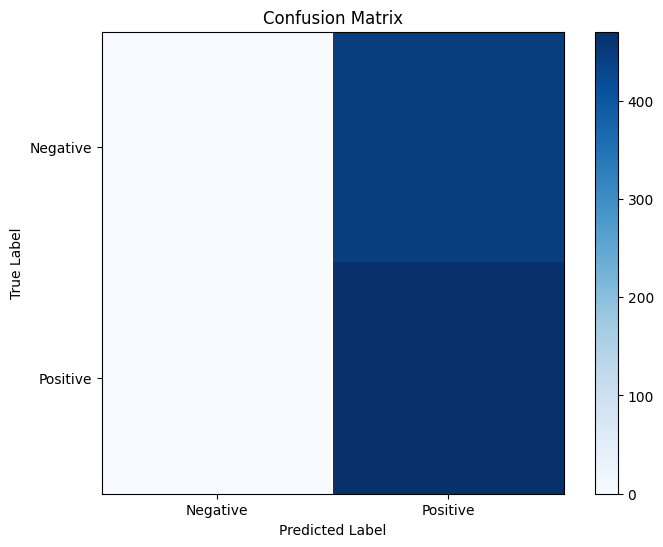

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       446
           1       0.51      1.00      0.68       470

    accuracy                           0.51       916
   macro avg       0.26      0.50      0.34       916
weighted avg       0.26      0.51      0.35       916



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
## Implement Here

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Remove samples with missing values
X_train = X_train.dropna()
y_train = y_train[X_train.index]
X_test = X_test.dropna()
y_test = y_test[X_test.index]

# Perform data preprocessing and feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the input data for LSTM
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Define the Keras LSTM model class
class KerasLSTMClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, lstm_units=32, dropout_rate=0.1, learning_rate=0.001, epochs=50, batch_size=32):
        self.lstm_units = lstm_units
        self.dropout_rate = dropout_rate
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = self.create_model()

    def create_model(self):
        model = Sequential()
        model.add(LSTM(self.lstm_units, input_shape=(1, X_train_scaled.shape[1])))
        model.add(Dropout(self.dropout_rate))
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(self.dropout_rate))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer=Adam(learning_rate=self.learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict_proba(self, X):
        return self.model.predict(X)

    def predict(self, X):
        return (self.predict_proba(X) > 0.5).astype(int)

# Create an instance of the KerasLSTMClassifier
keras_classifier = KerasLSTMClassifier()

# Define the hyperparameter grid
param_dist = {
    'lstm_units': [32, 64, 128],
    'dropout_rate': [0.1, 0.2, 0.3],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Perform random search for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=keras_classifier, param_distributions=param_dist, n_iter=10, cv=3, random_state=42)
random_search.fit(X_train_reshaped, y_train)

# Get the best model and hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_
print("Best Hyperparameters: ", best_params)

# Make predictions on the test set
y_pred_prob = best_model.predict_proba(X_test_reshaped)
y_pred = best_model.predict(X_test_reshaped)

# Calculate the ROC AUC and accuracy
roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test, y_pred)

print("ROC AUC: {:.4f}".format(roc_auc))
print("Accuracy: {:.4f}".format(accuracy))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))


The provided code implements a machine learning pipeline tailored for classification tasks using a Long Short-Term Memory (LSTM) neural network, a type of recurrent neural network (RNN) known for its ability to capture sequential patterns in data. The pipeline is designed to work with financial data, likely for predicting the future direction of a specific asset such as the S&P 500 index. The dataset includes various financial indicators like stock indices (e.g., FTSE, EuroStoxx50, S&P 500), bond yields (e.g., French-2Y, US-10Y), commodity prices (e.g., Gold, CRB), and possibly other economic metrics relevant to financial markets.

The code begins with standard data preprocessing steps, including removing samples with missing values and scaling features using MinMaxScaler. This ensures that all features are on a similar scale, which is important for neural network models to perform effectively.

Next, a custom Keras LSTM classifier (KerasLSTMClassifier) is defined, which inherits from scikit-learn's BaseEstimator and ClassifierMixin. This design enables seamless integration of the LSTM model with scikit-learn's cross-validation and evaluation tools. The LSTM model architecture is specified within the create_model method, comprising an LSTM layer followed by dropout layers to prevent overfitting, and dense layers with activation functions to learn complex patterns from the sequential data.

Hyperparameter tuning is performed using randomized search cross-validation (RandomizedSearchCV) to find the optimal combination of hyperparameters for the LSTM model. The hyperparameters considered for tuning include the number of LSTM units, dropout rate, and learning rate. By searching through different combinations of these hyperparameters, the algorithm aims to identify the configuration that yields the best performance on the validation data.

Once the hyperparameter tuning is complete, the best model obtained from the search is evaluated on the test set. Performance metrics such as ROC AUC score and accuracy are calculated to assess the model's ability to predict the target variable, which likely indicates the future direction of the asset under consideration. Additionally, a confusion matrix and classification report are generated to provide insights into the model's classification accuracy and performance across different classes.

However, despite the thorough implementation and evaluation process, the output results show a ROC AUC of 0.5000 and an accuracy of 0.5131, indicating that the model's performance is not significantly better than random guessing. This suggests that the current model architecture or the selected features might not be sufficient for capturing the underlying patterns in the financial data. Further experimentation with different model architectures, feature engineering techniques, or additional preprocessing steps may be necessary to improve the model's predictive performance.